# AR6 WG1 - SPM.7

This notebook reproduces a simplified version of **Figure SPM.7** of the IPCC's *Working Group I contribution to the Sixth Assessment Report* ([AR6 WG1](https://www.ipcc.ch/assessment-report/ar6/)).

The data supporting the SPM figure is published under a Creative Commons CC-BY license at 
the [Centre for Environmental Data Analyis (CEDA)](https://catalogue.ceda.ac.uk/uuid/ae4f1eb6fce24adcb92ddca1a7838a5c).

This notebook uses a version of that data which was processed for interoperability with the format used by IPCC WG3, the so-called IAMC format.  
The notebook is available under an open-source [BSD-3 License](https://github.com/openscm/AR6-WG1-Data-Compilation/blob/main/LICENSE) in the [openscm/AR6-WG1-Data-Compilation](https://github.com/openscm/AR6-WG1-Data-Compilation) GitHub repository.

The notebook uses the Python package [pyam](https://pyam-iamc.readthedocs.io), which provides a suite of features and methods for the analysis, validation and visualization of reference data and scenario results
generated by integrated assessment models, macro-energy tools and other frameworks
in the domain of energy transition, climate change mitigation and sustainable development.

In [1]:
import matplotlib.pyplot as plt
import pyam
import utils

<IPython.core.display.Javascript object>

In [2]:
rc = pyam.run_control()
rc.update("plotting.yaml")

## Import and inspect the scenario data

Import the scenario data as a [pyam.IamDataFrame](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html)
and display the timeseries data in wide, IAMC-style format
using [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries)...

The dataset shows carbon uptake until the end of the century, therefore it only has one "year" 2100.  
This is to be interpreted as "carbon uptake from 1850 until 2100".

In [3]:
df = pyam.IamDataFrame(utils.DATA_DIR / "processed" / "fig-spm7" / "fig-spm7-timeseries.csv")
df

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file /Users/dh/GitHub/AR6-WG1-Data-Compilation/data/processed/fig-spm7/fig-spm7-timeseries.csv


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IAMs (1)
 * scenario : SSP1-1.9, SSP1-2.6, SSP2-4.5, SSP3-7.0, SSP5-8.5 (5)
Timeseries data coordinates:
   region   : World (1)
   variable : Cumulative Carbon Uptake|Atmosphere, ... (3)
   unit     : Pg C (1)
   year     : 2100 (1)
Meta indicators:
   exclude (bool) False (1)

In [4]:
df.timeseries()

2100
model scenario region variable                            unit             
IAMs  SSP1-1.9 World  Cumulative Carbon Uptake|Atmosphere Pg C   233.837786
                      Cumulative Carbon Uptake|Land       Pg C   278.087310
                      Cumulative Carbon Uptake|Ocean      Pg C   278.884875
      SSP1-2.6 World  Cumulative Carbon Uptake|Atmosphere Pg C   344.257644
                      Cumulative Carbon Uptake|Land       Pg C   326.837522
                      Cumulative Carbon Uptake|Ocean      Pg C   313.893075
      SSP2-4.5 World  Cumulative Carbon Uptake|Atmosphere Pg C   677.028612
                      Cumulative Carbon Uptake|Land       Pg C   391.047144
                      Cumulative Carbon Uptake|Ocean      Pg C   402.608412
      SSP3-7.0 World  Cumulative Carbon Uptake|Atmosphere Pg C  1235.961617
                      Cumulative Carbon Uptake|Land       Pg C   502.446585
                      Cumulative Carbon Uptake|Ocean      Pg C   476.124788
      SSP5-8.5 World  Cumulative Carbon Uptake|Atmosphere Pg C  1802.993556
                      Cumulative Carbon Uptake|Land       Pg C   545.876692
                      Cumulative Carbon Uptake|Ocean      Pg C   539.181812

## Converting to CO2

The data converted from the CEDA Archive to the WG3-compatible data format is given in PgC
rather than GtCO2 used in the SPM figure.

**pyam** offers a simple `convert_unit()` function - see [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/unit_conversion.html) for more info!

In [5]:
df.convert_unit("Pg C", "Gt CO2", inplace=True)

## Switch to shorter variable names for nicer plots


In [6]:
df.rename(variable=dict([(i, i.split("|")[1]) for i in df.variable]), inplace=True)

## Create a simple plot for each scenario

Use [matplotlib](https://matplotlib.org) and
the [pyam plotting module](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html)
to create a multi-panel figure.

In [7]:
# This utility function sets the variable-to-RCP-SSP-color mapping in the run control
def set_rc_colors(scenario, rc=rc):

    color = pyam.plotting.PYAM_COLORS[f"AR6-{scenario}"]
    color_map = {
        "Atmosphere": "lightgrey",
        "Land": color,
        "Ocean": color,
    }

    rc.update(dict(color=dict(variable=color_map)))

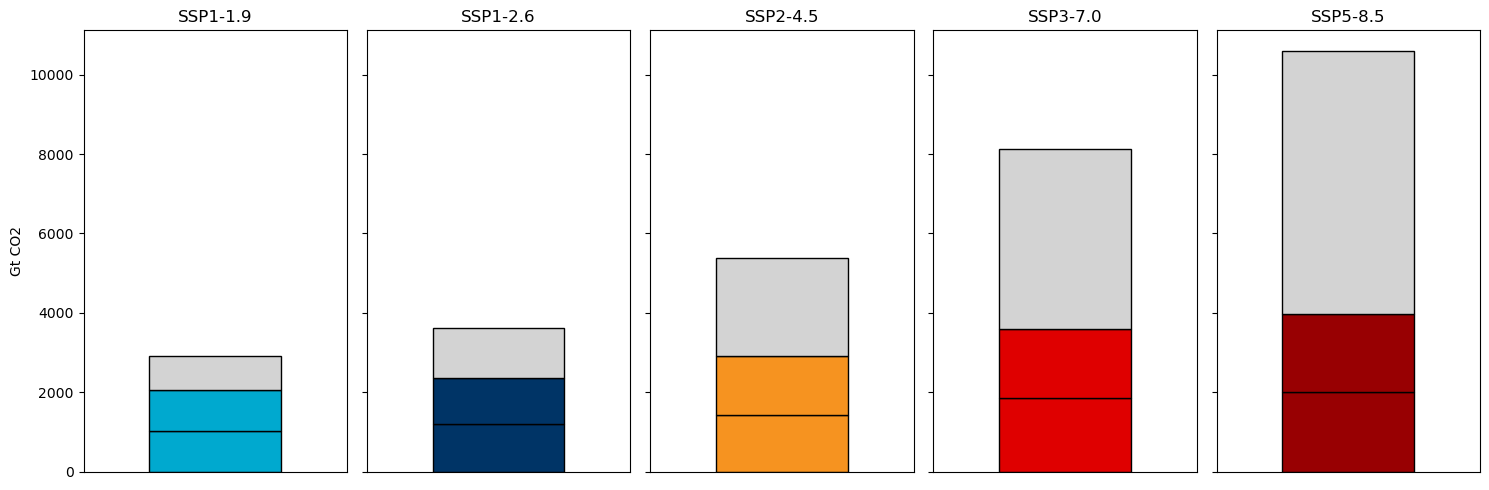

In [8]:
# We first create a matplotlib figure with several "axes" objects (i.e., individual plots)
fig, ax = plt.subplots(1, len(df.scenario), figsize=(15, 5), sharey=True)

# Then, we iterate over the axes, plotting the graph for each scenario as we go along
for i, s in enumerate(df.scenario):

    # The pyam-bar-plot method (currently) does not allow passing a `color` argument directly,
    # so this is written to the run control before creating each plot
    set_rc_colors(s)

    df.filter(scenario=s).plot.bar(
        ax=ax[i],
        bars_order=["Land", "Ocean", "Atmosphere"],
        edgecolor="black",
        stacked=True,
        legend=False
    )

    # We can also modify the axes objects directly to produce a better figure
    ax[i].set_title(s)
    ax[i].set_xticks([])
    ax[i].set_xlabel(None)

# Clean and show the plot
plt.tight_layout()
fig